In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")
#end = '2019-12-31'

#creating the dataframe
df= data.DataReader('AAPL', 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515213
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526476
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422664
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410790
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453412
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-05  150.919998  145.770004  147.770004  146.630005  68826400.0   
2022-12-06  147.300003  141.919998  147.070007  142.910004  64727200.0   
2022-12-07  143.369995  140.000000  142.190002  140.940002  69721100.0   
2022-12-08  143.520004  141.100006  142.360001  142.649994  62128300.0   
2022-12-09  145.570007  140.899

(3258, 6)

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
------------------------------checking data information-------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3258 entries, 2010-01-04 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3258 non-null   float64
 1   Low        3258 non-null   float64
 2   Open       3258 non-null   float64
 3   Close      3258 non-null   float64
 4   Volume     3258 non-null   float64
 5   Adj Close  3258 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB
------------------------------checking data shape-------------
(3258, 6)
------------------------------checking data description-------------
              High          Low         Open        Close        Volume  \
count  3258.000000  3258.000000  3258.000000  3258.000000  3.258000e+03   
mean     51.504641    50.379134    50.935750    50.963450  2.570043e+08   

<AxesSubplot: xlabel='Date'>

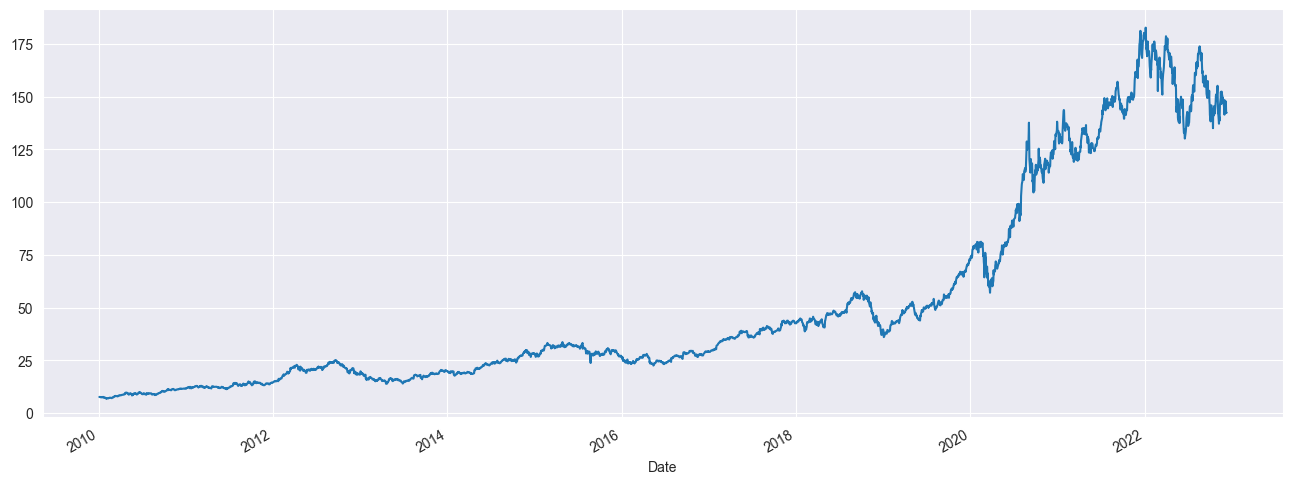

In [5]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
print("------------------------------checking data information-------------")
df.info()
print("------------------------------checking data shape-------------")
print(df.shape)
print("------------------------------checking data description-------------")
print(df.describe())
df['Open'].plot(figsize=(16,6))

In [163]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
df = df.reset_index()
df.head()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,14.688667,14.064000,14.324000,14.466000,88849500.0
1,15.200000,14.287333,14.316667,15.132667,168202500.0
2,15.165333,14.796667,15.094667,15.116667,88675500.0
3,15.354000,15.030000,15.128667,15.267333,82918500.0
4,15.461333,15.200000,15.264667,15.418667,59692500.0


In [164]:
#seperate the data into train and test data

train_headers = ['High','Low', 'Open','Volume']
target_headers = ['Close']

x = df[train_headers]
y = df[target_headers].pop('Close')

print(x.shape)
print(y.shape)

#we are going to scale down all the values we have so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(x)

train_header_array

X_train, X_test, y_train, y_test = train_test_split(train_header_array,y, test_size = 0.3, random_state =1)

print(X_train.shape)
print(X_test.shape)

(1495, 4)
(1495,)
(1046, 4)
(449, 4)


In [165]:
# setting up the Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
rgr = LinearRegression()
rgr.fit(X_train, y_train)

#getting the coefficient and intercept of the model
print('The coefficient of the model is ',rgr.coef_)
print('The intercept of the model is ',rgr.intercept_)

The coefficient of the model is  [ 338.8278118   320.72182305 -262.53815718    1.12748396]
The intercept of the model is  12.091509396482905


In [166]:

#predict the model
y_pred = rgr.predict(X_test)
print(y_pred)
print(y_test)

print(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('mse:  {:.2f}'.format(mse))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)


[ 21.04329311  20.26887879 301.23279179  18.82835732 142.09155316
  80.04979755 136.04989739 248.15676037 243.53308347  19.13251701
  15.23674671  24.51246019 396.33647399  22.33406973  15.37071621
 217.16333402  23.21239173 141.41395739 227.13395574  21.44280026
 237.81175176 283.35187615 220.70571487 249.43114585  22.74512798
 193.57559418 346.99133575 148.65744021 262.84021507  47.67028347
 308.82384272  22.02868542  32.34784792 147.4887991   20.58556441
 266.45945361  27.21105006  16.32901081  16.96997487 246.24307175
 139.84057897  18.56150085  16.19754571  16.52662777 107.02039817
  16.38502669 297.48653511 106.26461429 409.16261927  23.56756339
 298.71240516 358.21026477 142.22367978  24.27498312 223.54710967
 218.21121602  22.15603827 200.48096939  18.7091362   14.33470255
 221.98157873 272.30345932  17.9453306   21.272619   350.92106686
  20.71589713  22.5666953   18.97893373 235.7890033   20.13088278
  36.99534313  17.26732461 162.88319061  18.94996936 197.91355167
  38.94640

In [167]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
91       21.058666        21.043293
75       20.373333        20.268879
1210    303.226654       301.232792
330      19.032000        18.828357
961     141.559998       142.091553
...            ...              ...
494      22.198000        22.654027
581      15.676000        15.925547
154      24.253332        24.341739
643      15.254667        15.509113
774      43.371334        43.172623

[449 rows x 2 columns]


In [168]:
dfr.head(10)

,Actual Price,Predicted Price
91,21.058666,21.043293
75,20.373333,20.268879
1210,303.226654,301.232792
330,19.032000,18.828357
961,141.559998,142.091553
880,80.577332,80.049798
930,139.873337,136.049897
1076,244.076660,248.156760
1378,245.706665,243.533083
335,18.963333,19.132517


<AxesSubplot: >

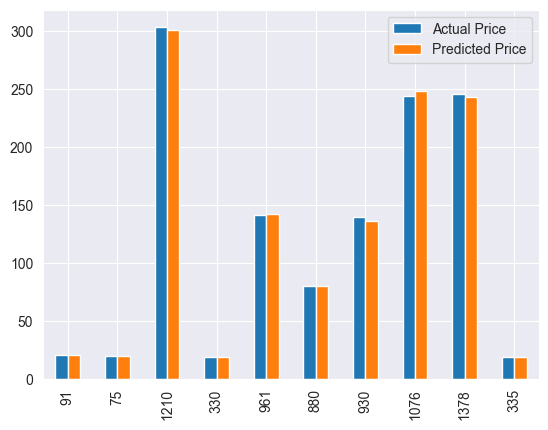

In [169]:
graph=dfr.head(10)
graph.plot(kind='bar')